# Exploring Scikit-Learn Datasets

In this section, we will explore various datasets provided by the Scikit-Learn library. We will load, preprocess, visualize, and analyze these datasets using Python code.

## Learning Outcome

Through these exercises, I learned how to load and explore datasets using Scikit-Learn. I practiced data preprocessing, visualization, and model evaluation techniques. I also explored additional datasets and applied similar steps to analyze them.



In [27]:
from sklearn import datasets


In [28]:
iris = datasets.load_iris()


In [29]:
print(iris.keys())  # Display the keys of the dataset
print(iris['DESCR'])  # Print the description of the dataset
print(iris.data)  # Display the features
print(iris.target)  # Display the labels


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

### Exploring and Visualizing Data

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


In [31]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target


In [32]:
print(iris_df.describe())  # Display basic statistics


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


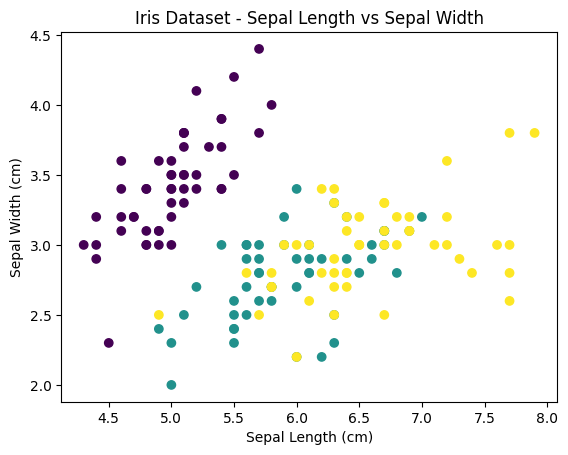

In [33]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.show()


### Data Processing

In [34]:
iris_df.fillna(iris_df.mean(), inplace=True)  # Fill missing values with mean


In [35]:
# No categorical variables in Iris dataset, but here's an example
from sklearn.preprocessing import LabelEncoder
iris_df['target'] = LabelEncoder().fit_transform(iris_df['target'])


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.drop('target', axis=1))


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_scaled, iris_df['target'], test_size=0.2, random_state=42)


In [38]:
from sklearn.neighbors import KNeighborsClassifier


In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred = knn.predict(X_test)


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [42]:
import joblib
joblib.dump(knn, 'knn_model.pkl')


['knn_model.pkl']

In [43]:
knn_loaded = joblib.load('knn_model.pkl')


In [44]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (120, 4)
Test set size: (30, 4)


### Exploring Additional Datasets

1. Wine Dataset
2. Digits Data Set

Wine dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Wine dataset description:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  

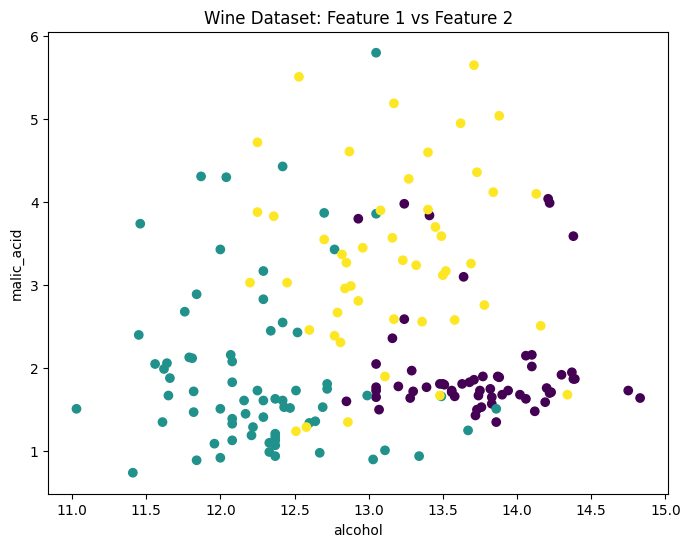

In [45]:
# Load the Wine dataset
wine = datasets.load_wine()

# Inspect the dataset structure and print key information
print("Wine dataset keys:", wine.keys())
print("\nWine dataset description:\n", wine.DESCR)
print("\nFeature Names:", wine.feature_names)
print("Target Names:", wine.target_names)

# Simple visualization: Scatter plot of the first two features
plt.figure(figsize=(8, 6))
plt.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('Wine Dataset: Feature 1 vs Feature 2')
plt.show()


Digits dataset keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Digits dataset description:
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the tes

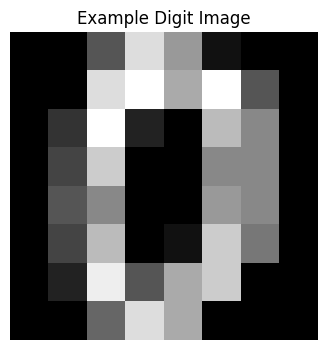

In [46]:
# Load the Digits dataset
digits = datasets.load_digits()

# Inspect the structure of the Digits dataset
print("Digits dataset keys:", digits.keys())
print("\nDigits dataset description:\n", digits.DESCR)
print("\nNumber of Samples:", len(digits.data))
print("Data shape:", digits.data.shape)
print("Image shape (for each sample):", digits.images[0].shape)

# Visualize a sample digit image
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[0], cmap='gray')
plt.title("Example Digit Image")
plt.axis('off')
plt.show()


## Learning Outcomes 

- **Dataset Exploration:**  
  - Learned how to load and inspect multiple built‑in datasets (Iris, Wine, and Digits) using the `datasets` module in scikit‑learn.
  - Explored the structure of each dataset by printing keys, descriptions, feature names, and target names.

- **Visualization:**  
  - Created scatter plots for the Iris and Wine datasets to understand the relationship between selected features.
  - Visualized an individual image from the Digits dataset to appreciate the data representation.

- **Data Splitting:**  
  - Demonstrated the process to split data into training and testing sets.




